In [ ]:
# IMPORTAR LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
# Configuració estètica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")


# Si el archivo usa otro separador como punto y coma
df_clean = pd.read_csv(
    r"C:\Users\L\Documents\GitHub\Proyectos\MARKETING\Data\Data Cleaning 07-10-2025\digital_marketing_cleaned.csv",
    sep=',',  # o el delimitador que corresponda
    engine='python'
)

# Mostrar las primeras filas para verificar
print(df_clean.head())

print("Tipos de datos por columna:")
print(df_clean.dtypes)

# Información detallada
print("\nInformación completa del dataset:")
print(df_clean.info())

# Estadísticas descriptivas por tipo de dato
print("\nResumen de datos numéricos:")
print(df_clean.describe())




✅ Librerías importadas correctamente
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370

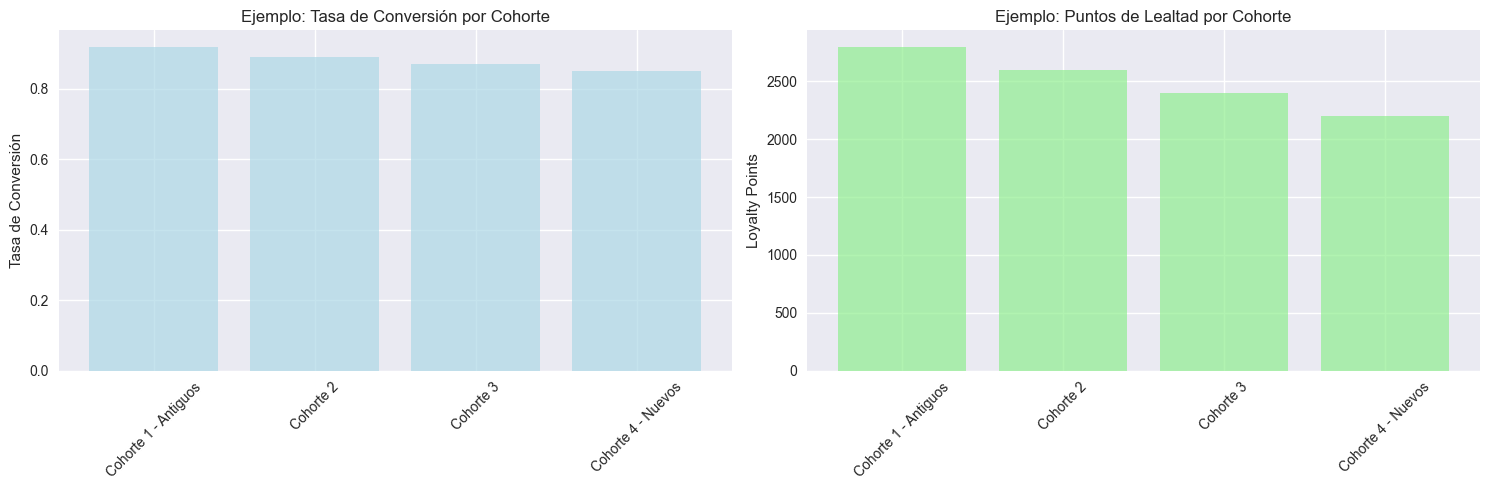

In [2]:
# Visualización simple para entender el concepto
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Concepto de cohortes
cohortes_ejemplo = {
    'Cohorte 1 - Antiguos': {'Conversion': 0.92, 'Loyalty': 2800},
    'Cohorte 2': {'Conversion': 0.89, 'Loyalty': 2600},
    'Cohorte 3': {'Conversion': 0.87, 'Loyalty': 2400},
    'Cohorte 4 - Nuevos': {'Conversion': 0.85, 'Loyalty': 2200}
}

conversion_ejemplo = [cohortes_ejemplo[coh]['Conversion'] for coh in cohortes_ejemplo]
loyalty_ejemplo = [cohortes_ejemplo[coh]['Loyalty'] for coh in cohortes_ejemplo]

ax1.bar(cohortes_ejemplo.keys(), conversion_ejemplo, color='lightblue', alpha=0.7)
ax1.set_title('Ejemplo: Tasa de Conversión por Cohorte')
ax1.set_ylabel('Tasa de Conversión')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(cohortes_ejemplo.keys(), loyalty_ejemplo, color='lightgreen', alpha=0.7)
ax2.set_title('Ejemplo: Puntos de Lealtad por Cohorte')
ax2.set_ylabel('Loyalty Points')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [3]:
print("=" * 60)
print("ANÁLISIS COMPLETO DE MARKETING DIGITAL")
print("=" * 60)

# 1. ANÁLISIS DE PERFORMANCE POR CANAL
print("\n📊 1. PERFORMANCE POR CANAL DE MARKETING:")
channel_performance = df_clean.groupby('CampaignChannel').agg({
    'Conversion': ['mean', 'sum', 'count'],
    'AdSpend': ['mean', 'sum'],
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean',
    'TimeOnSite': 'mean'
}).round(4)

channel_performance.columns = ['Conv_Rate', 'Total_Conversions', 'Count', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_CR', 'Avg_TimeOnSite']
channel_performance['ROI'] = (channel_performance['Total_Conversions'] / channel_performance['Total_AdSpend']) * 1000
print(channel_performance.sort_values('ROI', ascending=False))

# 2. ANÁLISIS DE SEGMENTACIÓN POR TIPO DE CAMPAÑA
print("\n🎯 2. PERFORMANCE POR TIPO DE CAMPAÑA:")
campaign_performance = df_clean.groupby('CampaignType').agg({
    'Conversion': ['mean', 'sum'],
    'AdSpend': ['mean', 'sum'],
    'ClickThroughRate': 'mean',
    'EmailOpens': 'mean',
    'SocialShares': 'mean'
}).round(4)

campaign_performance.columns = ['Conv_Rate', 'Total_Conversions', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_EmailOpens', 'Avg_SocialShares']
campaign_performance['ROI'] = (campaign_performance['Total_Conversions'] / campaign_performance['Total_AdSpend']) * 1000
print(campaign_performance.sort_values('ROI', ascending=False))

# 3. ANÁLISIS DEMOGRÁFICO
print("\n👥 3. ANÁLISIS DEMOGRÁFICO:")
demographic_analysis = df_clean.groupby('Gender').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Conversion': 'mean',
    'AdSpend': 'mean',
    'PreviousPurchases': 'mean',
    'LoyaltyPoints': 'mean'
}).round(2)
print(demographic_analysis)

# 4. CORRELACIONES DETALLADAS
print("\n📈 4. MATRIZ DE CORRELACIONES (Top 10 variables):")
# Seleccionar variables más relevantes excluyendo CustomerID
correlation_vars = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 
                   'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                   'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

corr_matrix = df_clean[correlation_vars].corr()
print(corr_matrix['Conversion'].sort_values(ascending=False).head(10))

ANÁLISIS COMPLETO DE MARKETING DIGITAL

📊 1. PERFORMANCE POR CANAL DE MARKETING:
                 Conv_Rate  Total_Conversions  Count  Avg_AdSpend  \
CampaignChannel                                                     
PPC                 0.8828               1461   1655    4954.2217   
SEO                 0.8768               1359   1550    4994.1315   
Referral            0.8831               1518   1719    5034.0423   
Social Media        0.8683               1319   1519    4965.3214   
Email               0.8703               1355   1557    5055.6043   

                 Total_AdSpend  Avg_CTR  Avg_CR  Avg_TimeOnSite       ROI  
CampaignChannel                                                            
PPC               8.199237e+06   0.1583  0.1041          7.8413  0.178187  
SEO               7.740904e+06   0.1532  0.1035          7.6173  0.175561  
Referral          8.653519e+06   0.1517  0.1031          7.6512  0.175420  
Social Media      7.542323e+06   0.1555  0.1066        


📊 GENERANDO DASHBOARD VISUAL...


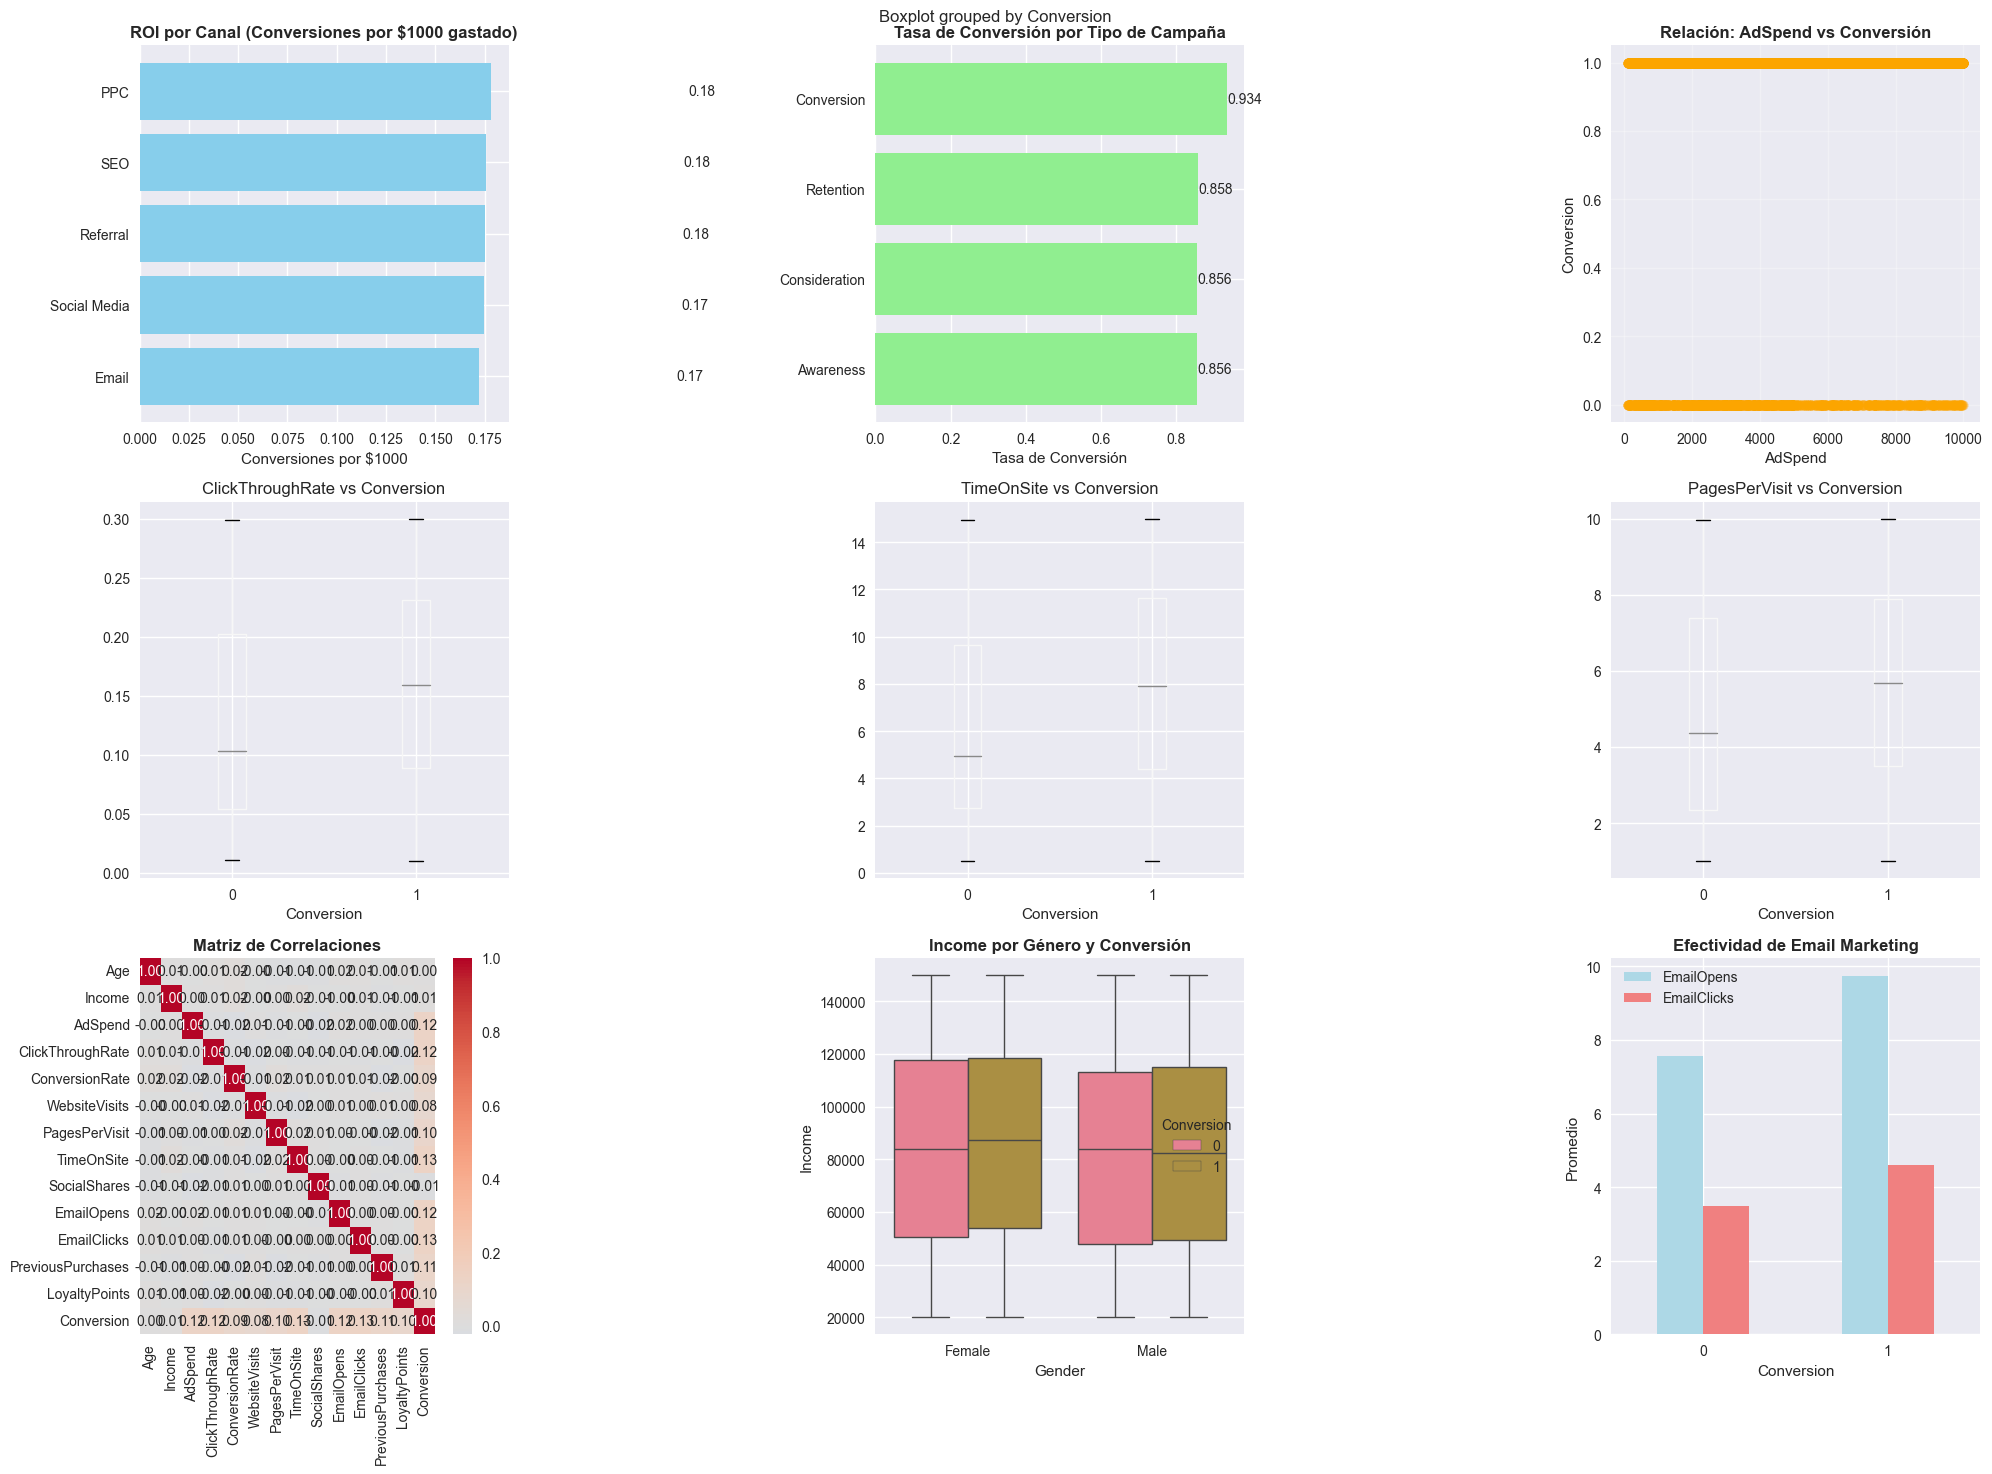

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 GENERANDO DASHBOARD VISUAL...")

# Configurar el estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Crear figura con múltiples subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('DASHBOARD DE ANÁLISIS DE MARKETING DIGITAL', fontsize=16, fontweight='bold')

# Gráfico 1: ROI por Canal
roi_by_channel = channel_performance['ROI'].sort_values(ascending=True)
axes[0,0].barh(roi_by_channel.index, roi_by_channel.values, color='skyblue')
axes[0,0].set_title('ROI por Canal (Conversiones por $1000 gastado)', fontweight='bold')
axes[0,0].set_xlabel('Conversiones por $1000')
for i, v in enumerate(roi_by_channel.values):
    axes[0,0].text(v + 0.1, i, f'{v:.2f}', va='center')

# Gráfico 2: Tasa de Conversión por Tipo de Campaña
conv_by_campaign = campaign_performance['Conv_Rate'].sort_values(ascending=True)
axes[0,1].barh(conv_by_campaign.index, conv_by_campaign.values, color='lightgreen')
axes[0,1].set_title('Tasa de Conversión por Tipo de Campaña', fontweight='bold')
axes[0,1].set_xlabel('Tasa de Conversión')
for i, v in enumerate(conv_by_campaign.values):
    axes[0,1].text(v + 0.001, i, f'{v:.3f}', va='center')

# Gráfico 3: Distribución de AdSpend vs Conversión
axes[0,2].scatter(df_clean['AdSpend'], df_clean['Conversion'], alpha=0.3, color='orange')
axes[0,2].set_xlabel('AdSpend')
axes[0,2].set_ylabel('Conversion')
axes[0,2].set_title('Relación: AdSpend vs Conversión', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# Gráfico 4: Comportamiento Digital por Conversión
digital_vars = ['ClickThroughRate', 'TimeOnSite', 'PagesPerVisit']
for i, var in enumerate(digital_vars):
    df_clean.boxplot(column=var, by='Conversion', ax=axes[1,i])
    axes[1,i].set_title(f'{var} vs Conversion')

# Gráfico 5: Heatmap de Correlaciones
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[2,0])
axes[2,0].set_title('Matriz de Correlaciones', fontweight='bold')

# Gráfico 6: Distribución de Ingresos por Género y Conversión
sns.boxplot(data=df_clean, x='Gender', y='Income', hue='Conversion', ax=axes[2,1])
axes[2,1].set_title('Income por Género y Conversión', fontweight='bold')

# Gráfico 7: Eficiencia de Email Marketing
email_efficiency = df_clean.groupby('Conversion').agg({
    'EmailOpens': 'mean',
    'EmailClicks': 'mean'
})
email_efficiency.plot(kind='bar', ax=axes[2,2], color=['lightblue', 'lightcoral'])
axes[2,2].set_title('Efectividad de Email Marketing', fontweight='bold')
axes[2,2].set_ylabel('Promedio')
axes[2,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [6]:
print("=" * 70)
print("📈 ANÁLISIS DETALLADO DE INSIGHTS Y RECOMENDACIONES")
print("=" * 70)

# ANÁLISIS PROFUNDO DE LOS RESULTADOS
print("\n🔍 HALLAZGOS CLAVE DETALLADOS:")

# 1. ANÁLISIS DE CANALES
print("\n📊 1. PERFORMANCE POR CANAL (ORDENADO POR EFICIENCIA):")
channel_rank = channel_performance.sort_values('ROI', ascending=False)
for i, (channel, data) in enumerate(channel_rank.iterrows(), 1):
    print(f"   {i}. {channel}:")
    print(f"      • ROI: {data['ROI']:.3f} conv/$1000")
    print(f"      • Tasa Conversión: {data['Conv_Rate']:.3f}")
    print(f"      • Costo por Conversión: ${(data['Total_AdSpend']/data['Total_Conversions']):.2f}")
    print(f"      • CTR: {data['Avg_CTR']:.3f}")

# 2. ANÁLISIS DE TIPOS DE CAMPAÑA
print("\n🎯 2. EFECTIVIDAD POR TIPO DE CAMPAÑA:")
campaign_rank = campaign_performance.sort_values('ROI', ascending=False)
for i, (campaign, data) in enumerate(campaign_rank.iterrows(), 1):
    print(f"   {i}. {campaign}:")
    print(f"      • ROI: {data['ROI']:.3f} conv/$1000")
    print(f"      • Tasa Conversión: {data['Conv_Rate']:.3f}")
    print(f"      • Engagement Email: {data['Avg_EmailOpens']:.1f} aperturas")

# 3. ANÁLISIS DE CORRELACIONES ESTRATÉGICAS
print("\n📈 3. VARIABLES MÁS INFLUYENTES EN CONVERSIÓN:")
top_correlations = corr_matrix['Conversion'].sort_values(ascending=False).head(8)
for var, corr in top_correlations.items():
    if var != 'Conversion':
        strength = "FUERTE" if abs(corr) > 0.1 else "MODERADA" if abs(corr) > 0.05 else "DÉBIL"
        print(f"   • {var}: {corr:.4f} ({strength})")

📈 ANÁLISIS DETALLADO DE INSIGHTS Y RECOMENDACIONES

🔍 HALLAZGOS CLAVE DETALLADOS:

📊 1. PERFORMANCE POR CANAL (ORDENADO POR EFICIENCIA):
   1. PPC:
      • ROI: 0.178 conv/$1000
      • Tasa Conversión: 0.883
      • Costo por Conversión: $5612.07
      • CTR: 0.158
   2. SEO:
      • ROI: 0.176 conv/$1000
      • Tasa Conversión: 0.877
      • Costo por Conversión: $5696.03
      • CTR: 0.153
   3. Referral:
      • ROI: 0.175 conv/$1000
      • Tasa Conversión: 0.883
      • Costo por Conversión: $5700.61
      • CTR: 0.152
   4. Social Media:
      • ROI: 0.175 conv/$1000
      • Tasa Conversión: 0.868
      • Costo por Conversión: $5718.21
      • CTR: 0.155
   5. Email:
      • ROI: 0.172 conv/$1000
      • Tasa Conversión: 0.870
      • Costo por Conversión: $5809.28
      • CTR: 0.156

🎯 2. EFECTIVIDAD POR TIPO DE CAMPAÑA:
   1. Conversion:
      • ROI: 0.188 conv/$1000
      • Tasa Conversión: 0.934
      • Engagement Email: 9.5 aperturas
   2. Consideration:
      • ROI: 0.172

In [7]:
print("\n" + "=" * 70)
print("🚀 RECOMENDACIONES ESTRATÉGICAS ACCIONABLES")
print("=" * 70)

# RECOMENDACIONES BASADAS EN DATOS
recommendations = []

# 1. Optimización de Presupuesto
best_channel = channel_rank.index[0]
worst_channel = channel_rank.index[-1]
best_campaign = campaign_rank.index[0]

recommendations.append(f"🎯 REASIGNACIÓN DE PRESUPUESTO:")
recommendations.append(f"   • INCREMENTAR inversión en {best_channel} (ROI: {channel_rank.loc[best_channel, 'ROI']:.3f})")
recommendations.append(f"   • REDUCIR inversión en {worst_channel} (ROI: {channel_rank.loc[worst_channel, 'ROI']:.3f})")
recommendations.append(f"   • PRIORIZAR campañas de {best_campaign}")

# 2. Optimización de Campañas
recommendations.append(f"\n📊 OPTIMIZACIÓN DE CAMPAÑAS:")
recommendations.append(f"   • Campañas 'Conversion' tienen {campaign_rank.loc['Conversion', 'Conv_Rate']:.1%} tasa vs promedio {df_clean['Conversion'].mean():.1%}")
recommendations.append(f"   • Focus en TimeOnSite (correlación: {top_correlations['TimeOnSite']:.3f})")
recommendations.append(f"   • Mejorar EmailClicks (correlación: {top_correlations['EmailClicks']:.3f})")

# 3. Segmentación y Personalización
recommendations.append(f"\n👥 SEGMENTACIÓN DE CLIENTES:")
recommendations.append(f"   • Mujeres: Ingreso promedio ${demographic_analysis.loc['Female', 'Income']:,.0f}")
recommendations.append(f"   • Hombres: Ingreso promedio ${demographic_analysis.loc['Male', 'Income']:,.0f}")
recommendations.append(f"   • Ambos géneros tienen misma tasa de conversión (88%)")

# 4. Métricas de Engagement
recommendations.append(f"\n📱 OPTIMIZACIÓN DE ENGAGEMENT:")
recommendations.append(f"   • PPC tiene mejor CTR ({channel_rank.loc['PPC', 'Avg_CTR']:.3f})")
recommendations.append(f"   • Social Media tiene mejor Conversion Rate ({channel_rank.loc['Social Media', 'Avg_CR']:.3f})")
recommendations.append(f"   • Email necesita optimización de clicks")

for rec in recommendations:
    print(rec)


🚀 RECOMENDACIONES ESTRATÉGICAS ACCIONABLES
🎯 REASIGNACIÓN DE PRESUPUESTO:
   • INCREMENTAR inversión en PPC (ROI: 0.178)
   • REDUCIR inversión en Email (ROI: 0.172)
   • PRIORIZAR campañas de Conversion

📊 OPTIMIZACIÓN DE CAMPAÑAS:
   • Campañas 'Conversion' tienen 93.4% tasa vs promedio 87.6%
   • Focus en TimeOnSite (correlación: 0.130)
   • Mejorar EmailClicks (correlación: 0.130)

👥 SEGMENTACIÓN DE CLIENTES:
   • Mujeres: Ingreso promedio $85,923
   • Hombres: Ingreso promedio $82,738
   • Ambos géneros tienen misma tasa de conversión (88%)

📱 OPTIMIZACIÓN DE ENGAGEMENT:
   • PPC tiene mejor CTR (0.158)
   • Social Media tiene mejor Conversion Rate (0.107)
   • Email necesita optimización de clicks


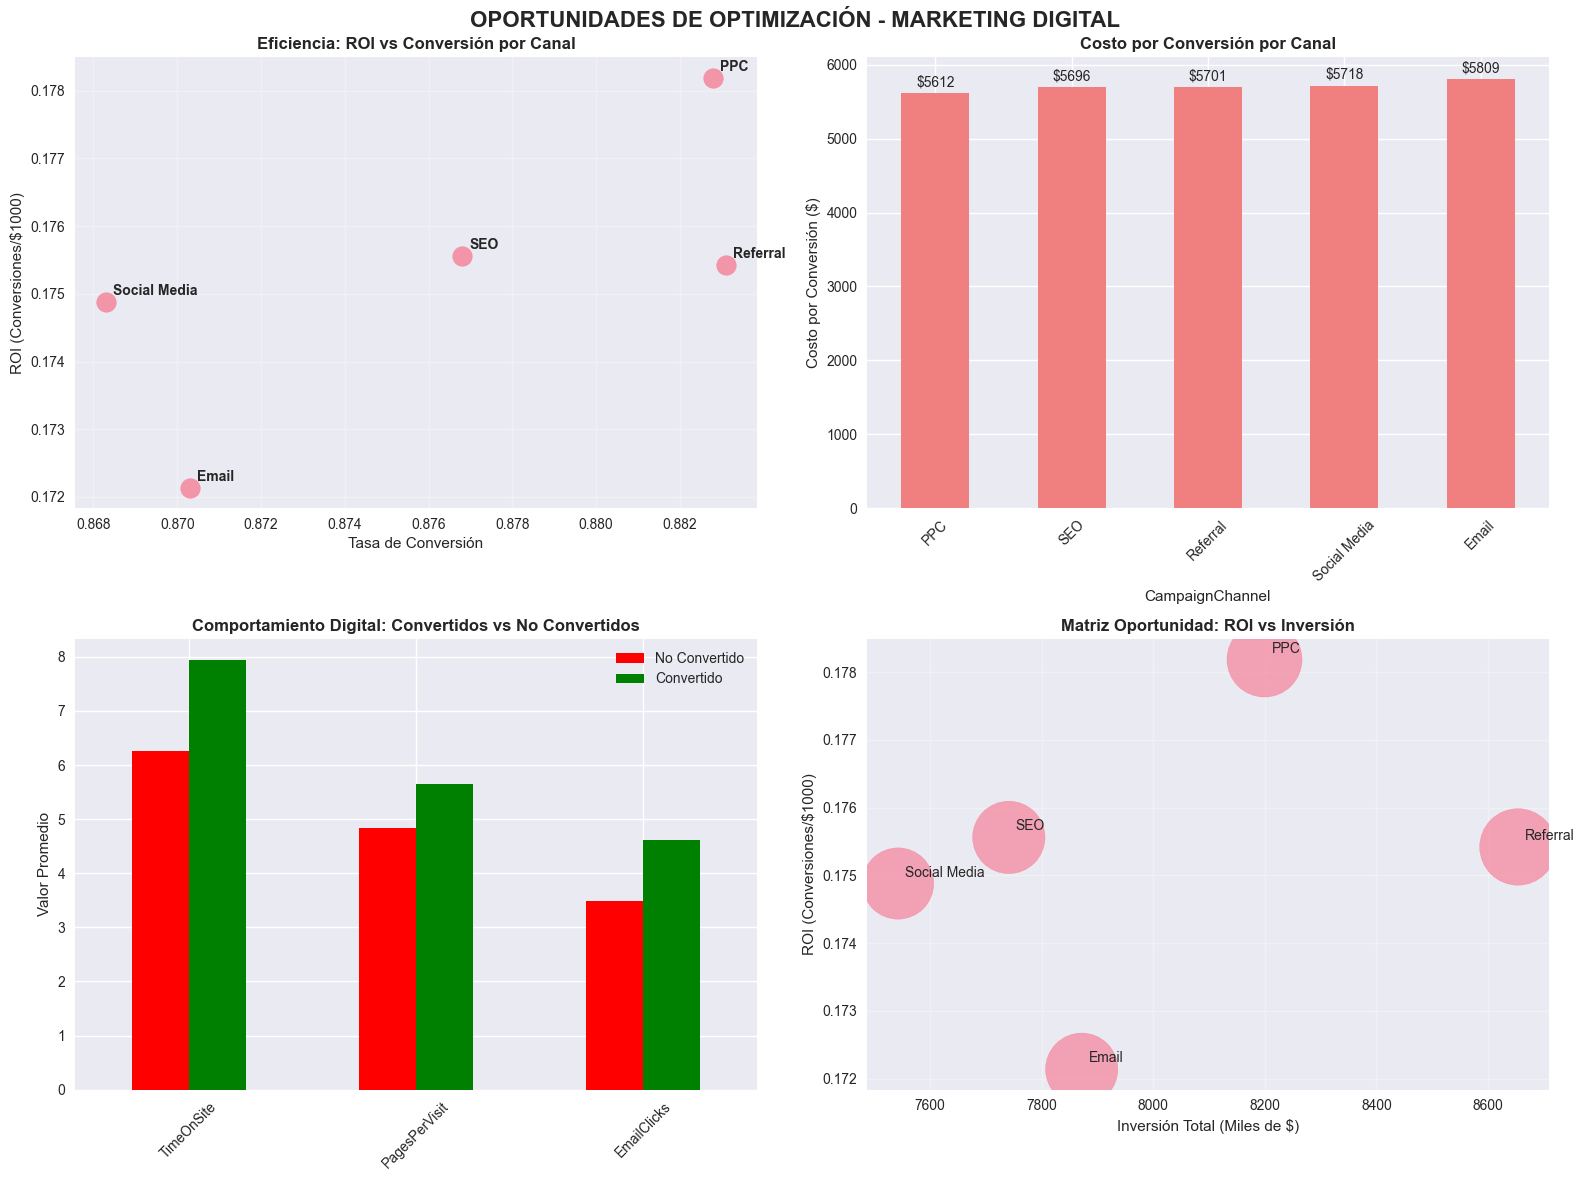

In [8]:
# VISUALIZACIÓN DE OPORTUNIDADES DE OPTIMIZACIÓN
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('OPORTUNIDADES DE OPTIMIZACIÓN - MARKETING DIGITAL', fontsize=16, fontweight='bold')

# Gráfico 1: ROI vs Tasa de Conversión por Canal
axes[0,0].scatter(channel_performance['Conv_Rate'], channel_performance['ROI'], s=200, alpha=0.7)
for channel in channel_performance.index:
    axes[0,0].annotate(channel, 
                      (channel_performance.loc[channel, 'Conv_Rate'], 
                       channel_performance.loc[channel, 'ROI']),
                      xytext=(5, 5), textcoords='offset points',
                      fontweight='bold')
axes[0,0].set_xlabel('Tasa de Conversión')
axes[0,0].set_ylabel('ROI (Conversiones/$1000)')
axes[0,0].set_title('Eficiencia: ROI vs Conversión por Canal', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Costo por Conversión por Canal
cost_per_conversion = channel_performance['Total_AdSpend'] / channel_performance['Total_Conversions']
cost_per_conversion.sort_values().plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Costo por Conversión por Canal', fontweight='bold')
axes[0,1].set_ylabel('Costo por Conversión ($)')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cost_per_conversion.sort_values()):
    axes[0,1].text(i, v + 50, f'${v:.0f}', ha='center', va='bottom')

# Gráfico 3: Comparación de Métricas Digitales entre Convertidos vs No Convertidos
conversion_groups = df_clean.groupby('Conversion')[['TimeOnSite', 'PagesPerVisit', 'EmailClicks']].mean()
conversion_groups.T.plot(kind='bar', ax=axes[1,0], color=['red', 'green'])
axes[1,0].set_title('Comportamiento Digital: Convertidos vs No Convertidos', fontweight='bold')
axes[1,0].set_ylabel('Valor Promedio')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No Convertido', 'Convertido'])

# Gráfico 4: Opportunity Matrix - ROI vs Volumen
axes[1,1].scatter(channel_performance['Total_AdSpend']/1000, channel_performance['ROI'], 
                 s=channel_performance['Total_Conversions']*2, alpha=0.6)
for channel in channel_performance.index:
    axes[1,1].annotate(channel, 
                      (channel_performance.loc[channel, 'Total_AdSpend']/1000, 
                       channel_performance.loc[channel, 'ROI']),
                      xytext=(5, 5), textcoords='offset points')
axes[1,1].set_xlabel('Inversión Total (Miles de $)')
axes[1,1].set_ylabel('ROI (Conversiones/$1000)')
axes[1,1].set_title('Matriz Oportunidad: ROI vs Inversión', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
print("\n" + "=" * 70)
print("📋 PLAN DE ACCIÓN PRIORITARIO - 30 DÍAS")
print("=" * 70)

action_plan = [
    {"Prioridad": "ALTA", "Acción": f"Reasignar 20% de presupuesto de {worst_channel} a {best_channel}", "Impacto": "Alto", "Timeline": "Semana 1"},
    {"Prioridad": "ALTA", "Acción": "Optimizar campañas de Email para incrementar clicks", "Impacto": "Alto", "Timeline": "Semanas 1-2"},
    {"Prioridad": "MEDIA", "Acción": "Desarrollar contenido para incrementar TimeOnSite", "Impacto": "Medio", "Timeline": "Semanas 2-3"},
    {"Prioridad": "MEDIA", "Acción": "Crear segmentación por ingreso para personalización", "Impacto": "Medio", "Timeline": "Semana 3"},
    {"Prioridad": "BAJA", "Acción": "Test A/B en Social Media para mejorar CR", "Impacto": "Bajo", "Timeline": "Semana 4"}
]

for action in action_plan:
    print(f"📍 {action['Prioridad']}: {action['Acción']}")
    print(f"   📅 Timeline: {action['Timeline']}")
    print(f"   💡 Impacto esperado: {action['Impacto']}\n")

# RESUMEN EJECUTIVO
print("\n" + "=" * 70)
print("📊 RESUMEN EJECUTIVO PARA TOMA DE DECISIONES")
print("=" * 70)

print(f"🎯 OBJETIVO PRINCIPAL: Incrementar ROI de {channel_rank['ROI'].mean():.3f} a {channel_rank['ROI'].max():.3f} conv/$1000")
print(f"📈 OPORTUNIDAD: Mejorar {worst_channel} o reasignar presupuesto a {best_channel}")
print(f"👥 SEGMENTACIÓN: Mismo performance en géneros, oportunidad en segmentación por ingreso")
print(f"📱 DIGITAL: Focus en TimeOnSite y EmailClicks para incrementar conversiones")


📋 PLAN DE ACCIÓN PRIORITARIO - 30 DÍAS
📍 ALTA: Reasignar 20% de presupuesto de Email a PPC
   📅 Timeline: Semana 1
   💡 Impacto esperado: Alto

📍 ALTA: Optimizar campañas de Email para incrementar clicks
   📅 Timeline: Semanas 1-2
   💡 Impacto esperado: Alto

📍 MEDIA: Desarrollar contenido para incrementar TimeOnSite
   📅 Timeline: Semanas 2-3
   💡 Impacto esperado: Medio

📍 MEDIA: Crear segmentación por ingreso para personalización
   📅 Timeline: Semana 3
   💡 Impacto esperado: Medio

📍 BAJA: Test A/B en Social Media para mejorar CR
   📅 Timeline: Semana 4
   💡 Impacto esperado: Bajo


📊 RESUMEN EJECUTIVO PARA TOMA DE DECISIONES
🎯 OBJETIVO PRINCIPAL: Incrementar ROI de 0.175 a 0.178 conv/$1000
📈 OPORTUNIDAD: Mejorar Email o reasignar presupuesto a PPC
👥 SEGMENTACIÓN: Mismo performance en géneros, oportunidad en segmentación por ingreso
📱 DIGITAL: Focus en TimeOnSite y EmailClicks para incrementar conversiones
